In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [2]:
results_location  = '../../../../data/results/'

In [3]:
results_files = ['careful_iterations=887_samples=900083_scalefunc=K_0_delta=500_centroids=346_sizeBytes=5568_impl=merging_alt_false.csv',
 'careful_iterations=890_samples=2413634_scalefunc=K_0_delta=500_centroids=350_sizeBytes=4232_impl=tree.csv',
 'careful_iterations=889_samples=1038262_scalefunc=K_0_delta=500_centroids=348_sizeBytes=5600_impl=merging_alt_true.csv']

In [4]:
class TDigestRun(object):
    
    def __init__(self, f, error='abs'):
        self.filename = f
        self.error = error
        
    def readable_name(self):
        return self.filename.rstrip('.csv').split('=')[-1]

    def set_df(self, df):
        self.df = df
        
    def plot_data(self):
        err = 'TD abs. error' if self.error ==  'abs' else 'rel. error' if self.error == 'rel' else None
        plt.plot(self.df['true quantile'][:200], self.df[err][:200], label=self.readable_name())
        

In [5]:
sorted_results_files = ['careful_iterations=887_samples=900083_scalefunc=K_0_delta=500_centroids=304_sizeBytes=4896_impl=merging_alt_false_sorted.csv',
'careful_iterations=889_samples=1038262_scalefunc=K_0_delta=500_centroids=307_sizeBytes=4944_impl=merging_alt_true_sorted.csv',
'careful_iterations=890_samples=2413634_scalefunc=K_0_delta=500_centroids=315_sizeBytes=3812_impl=tree_sorted.csv']

In [6]:
def display(res_files, error='abs'):
    digests = []

    for fname in res_files:
        tdr = TDigestRun(fname, error=error)
        with open(results_location + fname, 'r') as f:
            tdr.set_df(pd.read_csv(f, header=0, sep=';'))
        digests.append(tdr)

    for t in digests:
        t.plot_data()

    plt.legend()
    plt.xlabel('quantile')
    plt.ylabel('error')
    plt.show()

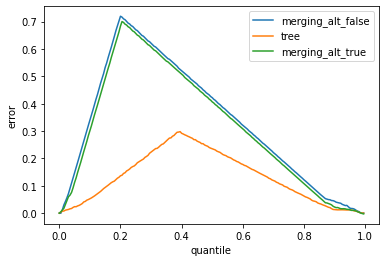

In [7]:
display(results_files)

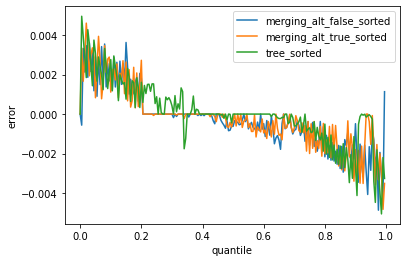

In [8]:
display(sorted_results_files)

In [9]:
centroids_results = ['centroids_' + x for x in results_files]

In [10]:
centroids_results

['centroids_careful_iterations=887_samples=900083_scalefunc=K_0_delta=500_centroids=346_sizeBytes=5568_impl=merging_alt_false.csv',
 'centroids_careful_iterations=890_samples=2413634_scalefunc=K_0_delta=500_centroids=350_sizeBytes=4232_impl=tree.csv',
 'centroids_careful_iterations=889_samples=1038262_scalefunc=K_0_delta=500_centroids=348_sizeBytes=5600_impl=merging_alt_true.csv']

In [11]:
with open(results_location + centroids_results[0], 'r') as f:
    cc = [[float(y) for y in line.rstrip('\n').split(',') if len(y) > 0] for line in f.readlines()]

In [12]:
sum([len(x) - 1 for x in cc]) #verify correct number of samples

900083

In [13]:
ks__ = []
for _ in range(len(cc) - 1):
    __ = cc[_]
    x = __[0]
    vals = __[1:]
    next_vals = cc[_ + 1][1:]
    k = ks_2samp(vals, next_vals)[0]
    #m = min(vals)
    #M = max(vals)
 #   print(m, M)
    ks__.append(k)
    #plt.scatter(x, k)
#    plt.scatter(x, M)
        

In [14]:
centroid_counts = [len(x) -1 for x in cc]

total_count = sum(centroid_counts)

quantiles = [c / total_count for c in centroid_counts]

len(ks__)

cum_quantiles = [sum(quantiles[:q]) for q in range(len(quantiles))]

len(cum_quantiles)

346

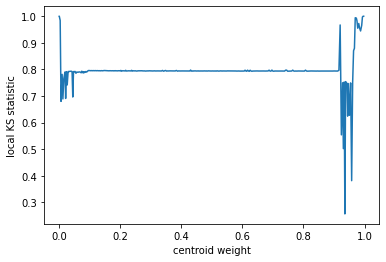

In [18]:
plt.xlabel('centroid weight')
plt.ylabel('local KS statistic')
plt.plot(cum_quantiles[:-1], ks__)